<a href="https://colab.research.google.com/github/CiaraFarrellSETU/phd/blob/main/Liskeenanfen_Winter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install rasterio matplotlib numpy


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 74.3 MB/s eta 0:00:00


In [ ]:
import rasterio
from rasterio.plot import show
import matplotlib.pyplot as plt
import numpy as np
import os # For checking file existence
from torchvision.transforms import ToTensor
from rasterio.plot import show

In [ ]:
NDVI_FILE_PATH = '/content/Liskeenanfen_Winter_NDVI.tif'

In [ ]:
with rasterio.open(NDVI_FILE_PATH) as src_ndvi:
            ndvi_data = src_ndvi.read(1) # Read the single NDVI band

            # Handle NoData values (replace with NaN for correct statistics)
            if src_ndvi.nodata is not None:
                ndvi_data = np.where(ndvi_data == src_ndvi.nodata, np.nan, ndvi_data)

            # Calculate statistics, ignoring NaN values
            min_ndvi = np.nanmin(ndvi_data)
            max_ndvi = np.nanmax(ndvi_data)
            mean_ndvi = np.nanmean(ndvi_data)
            std_ndvi = np.nanstd(ndvi_data)
            median_ndvi = np.nanmedian(ndvi_data)

            print(f"NDVI Statistics for {NDVI_FILE_PATH}:")
            print(f"  Min: {min_ndvi:.3f}")
            print(f"  Max: {max_ndvi:.3f}")
            print(f"  Mean: {mean_ndvi:.3f}")
            print(f"  Standard Deviation: {std_ndvi:.3f}")
            print(f"  Median: {median_ndvi:.3f}")

            # calculate percentiles
            p10 = np.nanpercentile(ndvi_data, 10)
            p90 = np.nanpercentile(ndvi_data, 90)
            print(f"  10th Percentile: {p10:.3f}")
            print(f"  90th Percentile: {p90:.3f}")

NDVI Statistics for /content/Liskeenanfen_Winter_NDVI.tif:
  Min: -0.140
  Max: 0.927
  Mean: 0.587
  Standard Deviation: 0.101
  Median: 0.592
  10th Percentile: 0.462
  90th Percentile: 0.709


In [ ]:
HEALTHY_VEG_THRESHOLD = float(input("Enter the threshold for Very Healthy/Lush Vegetation (e.g., 0.8): "))
MODERATE_VEG_THRESHOLD = float(input("Enter the upper threshold for Healthy Vegetation (e.g., 0.6): "))
SPARSE_VEG_THRESHOLD = float(input("Enter the upper threshold for Moderate Vegetation (e.g., 0.4): "))
NON_VEGETATED_THRESHOLD = float(input("Enter the upper threshold for Sparse/Poor Vegetation (e.g., 0.2): "))


print("NDVI thresholds defined:")
print(f"  Very Healthy/Lush Vegetation: > {HEALTHY_VEG_THRESHOLD}")
print(f"  Healthy Vegetation: {MODERATE_VEG_THRESHOLD} - {HEALTHY_VEG_THRESHOLD}")
print(f"  Moderate Vegetation: {SPARSE_VEG_THRESHOLD} - {MODERATE_VEG_THRESHOLD}")
print(f"  Sparse/Poor Vegetation: {NON_VEGETATED_THRESHOLD} - {SPARSE_VEG_THRESHOLD}")
print(f"  Non-Vegetated/Very Low Vigor: <= {NON_VEGETATED_THRESHOLD}")

Enter the threshold for Very Healthy/Lush Vegetation (e.g., 0.8): 0.8
Enter the upper threshold for Healthy Vegetation (e.g., 0.6): .65
Enter the upper threshold for Moderate Vegetation (e.g., 0.4): .5
Enter the upper threshold for Sparse/Poor Vegetation (e.g., 0.2): .2
NDVI thresholds defined:
  Very Healthy/Lush Vegetation: > 0.8
  Healthy Vegetation: 0.65 - 0.8
  Moderate Vegetation: 0.5 - 0.65
  Sparse/Poor Vegetation: 0.2 - 0.5
  Non-Vegetated/Very Low Vigor: <= 0.2


In [ ]:
import numpy as np
if ndvi_data is not None:
    # Get the minimum and maximum NDVI values from the data
    min_ndvi_data = np.nanmin(ndvi_data)
    max_ndvi_data = np.nanmax(ndvi_data)

    print(f"\nReviewing NDVI thresholds against data range ({min_ndvi_data:.3f} to {max_ndvi_data:.3f}):")

    # Check if the lowest threshold is within the data range or below the minimum
    if NON_VEGETATED_THRESHOLD < min_ndvi_data:
        print(f"  Warning: Lowest threshold ({NON_VEGETATED_THRESHOLD:.3f}) is higher than the minimum NDVI in data ({min_ndvi_data:.3f}). Pixels below the threshold will be unclassified unless they are NoData.")
    else:
         print(f"  Lowest threshold ({NON_VEGETATED_THRESHOLD:.3f}) is appropriate relative to minimum NDVI ({min_ndvi_data:.3f}).")


    # Check if the highest threshold covers the maximum value
    if HEALTHY_VEG_THRESHOLD < max_ndvi_data:
        print(f"  Highest threshold ({HEALTHY_VEG_THRESHOLD:.3f}) is lower than the maximum NDVI in data ({max_ndvi_data:.3f}). Pixels above this threshold are assigned to the highest category (5).")
    else:
         print(f"  Highest threshold ({HEALTHY_VEG_THRESHOLD:.3f}) covers the maximum NDVI ({max_ndvi_data:.3f}).")

    # Optionally, check if there are gaps between thresholds (though this setup doesn't create gaps)
    # Check threshold ordering
    if not (NON_VEGETATED_THRESHOLD <= SPARSE_VEG_THRESHOLD <= MODERATE_VEG_THRESHOLD <= HEALTHY_VEG_THRESHOLD):
        print("  Error: NDVI thresholds are not in increasing order.")
    else:
        print("  Thresholds are in increasing order.")

    # Display the defined thresholds
    print("\nDefined NDVI Thresholds:")
    print(f"  Non-Vegetated/Very Low Vigor (Category 1): NDVI <= {NON_VEGETATED_THRESHOLD}")
    print(f"  Sparse/Poor Vegetation (Category 2): {NON_VEGETATED_THRESHOLD} < NDVI <= {SPARSE_VEG_THRESHOLD}")
    print(f"  Moderate Vegetation (Category 3): {SPARSE_VEG_THRESHOLD} < NDVI <= {MODERATE_VEG_THRESHOLD}")
    print(f"  Healthy Vegetation (Category 4): {MODERATE_VEG_THRESHOLD} < NDVI <= {HEALTHY_VEG_THRESHOLD}")
    print(f"  Very Healthy/Lush Vegetation (Category 5): NDVI > {HEALTHY_VEG_THRESHOLD}")

else:
    print("NDVI data not available for threshold review.")


Reviewing NDVI thresholds against data range (-0.140 to 0.927):
  Lowest threshold (0.200) is appropriate relative to minimum NDVI (-0.140).
  Highest threshold (0.800) is lower than the maximum NDVI in data (0.927). Pixels above this threshold are assigned to the highest category (5).
  Thresholds are in increasing order.

Defined NDVI Thresholds:
  Non-Vegetated/Very Low Vigor (Category 1): NDVI <= 0.2
  Sparse/Poor Vegetation (Category 2): 0.2 < NDVI <= 0.5
  Moderate Vegetation (Category 3): 0.5 < NDVI <= 0.65
  Healthy Vegetation (Category 4): 0.65 < NDVI <= 0.8
  Very Healthy/Lush Vegetation (Category 5): NDVI > 0.8


In [ ]:
# 1. Create an empty array for classified data
classified_data = np.zeros_like(ndvi_data, dtype=np.uint8)

# 2. Apply classification rules using np.where
# Start from the highest category and work down to avoid overwriting
classified_data = np.where(ndvi_data > HEALTHY_VEG_THRESHOLD, 5, classified_data) # Very Healthy/Lush Vegetation
classified_data = np.where((ndvi_data > MODERATE_VEG_THRESHOLD) & (ndvi_data <= HEALTHY_VEG_THRESHOLD), 4, classified_data) # Healthy Vegetation
classified_data = np.where((ndvi_data > SPARSE_VEG_THRESHOLD) & (ndvi_data <= MODERATE_VEG_THRESHOLD), 3, classified_data) # Moderate Vegetation
classified_data = np.where((ndvi_data > NON_VEGETATED_THRESHOLD) & (ndvi_data <= SPARSE_VEG_THRESHOLD), 2, classified_data) # Sparse/Poor Vegetation
classified_data = np.where(ndvi_data <= NON_VEGETATED_THRESHOLD, 1, classified_data) # Non-Vegetated/Very Low Vigor

# 3. Replace NaN values with 0 (or another designated NoData value)
classified_data = np.nan_to_num(classified_data, nan=0).astype(np.uint8)

In [ ]:
if ndvi_data is not None:
    # --- Get unique categories and their counts ---
    # np.unique with return_counts=True gives unique values and how many times they appear.
    #  filter out NaN values before counting to only include classified pixels.
    unique_categories, counts = np.unique(classified_data[~np.isnan(ndvi_data)], return_counts=True)
    category_counts = dict(zip(unique_categories, counts))

    # Calculate the total number of pixels that were actually classified (not NaN in original NDVI)
    # Exclude category 0 (which corresponds to original NaN values)
    total_classified_pixels = sum(count for category_id, count in category_counts.items() if category_id != 0)


    print("\nPixel Counts by Category:")
    # Define a dictionary to map category IDs to human-readable names
    category_names = {
        1: "Non-Vegetated/Very Low Vigor",
        2: "Sparse/Poor Vegetation",
        3: "Moderate Vegetation",
        4: "Healthy Vegetation",
        5: "Very Healthy/Lush Vegetation"
    }

    # Iterate through the sorted category IDs to print results consistently
    for category_id in sorted(category_counts.keys()):
        if category_id != 0:  # Exclude category 0 from the printed output
            count = category_counts[category_id]
            # Calculate percentage based on the total classified pixels (excluding category 0)
            percentage = (count / total_classified_pixels) * 100 if total_classified_pixels > 0 else 0
            # Get the descriptive name for the category, or a fallback if not found
            name = category_names.get(category_id, f"Unknown Category {int(category_id)}")
            print(f"  {name}: {int(count)} pixels ({percentage:.2f}%)")
        else:
            # Optionally, print the count of NoData pixels separately
            print(f"  NoData (originally NaN): {int(category_counts[0])} pixels")

else:
    print("Classification skipped because NDVI data could not be loaded.")


Pixel Counts by Category:
  Non-Vegetated/Very Low Vigor: 212446 pixels (0.19%)
  Sparse/Poor Vegetation: 17732650 pixels (16.08%)
  Moderate Vegetation: 64379153 pixels (58.38%)
  Healthy Vegetation: 26869339 pixels (24.36%)
  Very Healthy/Lush Vegetation: 1088691 pixels (0.99%)


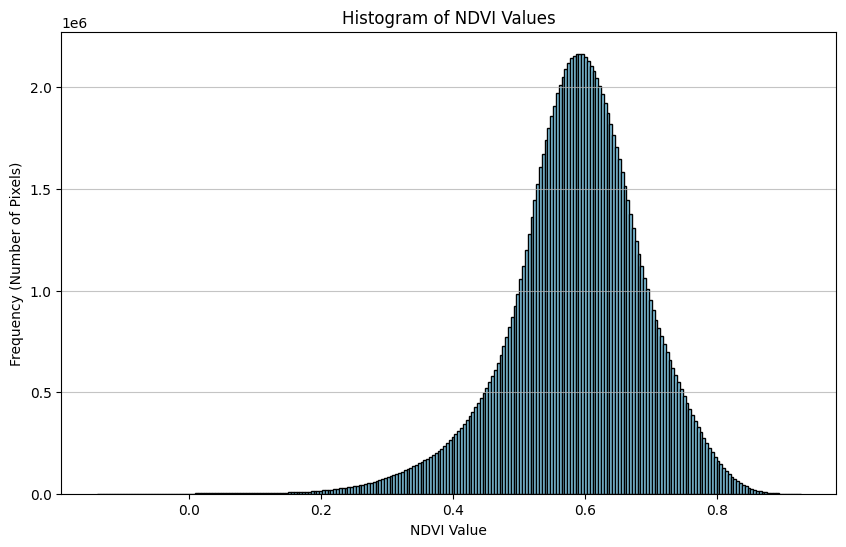

In [ ]:

import matplotlib.pyplot as plt
import numpy as np

if 'ndvi_data' in locals() and ndvi_data is not None:
    unmasked_ndvi_values = ndvi_data[~np.isnan(ndvi_data)]

    plt.figure(figsize=(10, 6))
    plt.hist(unmasked_ndvi_values, bins=250, color='skyblue', edgecolor='black') # Adjust bins as needed
    plt.title("Histogram of NDVI Values")
    plt.xlabel("NDVI Value")
    plt.ylabel("Frequency (Number of Pixels)")
    plt.grid(axis='y', alpha=0.75)
    plt.show()
else:
    print("NDVI data not available to generate histogram.")

In [ ]:
if 'src_ndvi' in locals() and src_ndvi is not None:
    # Get the pixel area from the georeferencing information
    # The transform is a 6-element tuple (c, a, b, f, d, e)
    # where (c, f) is the origin (top-left corner), (a, d) are the pixel size in x and y direction,
    # and (b, e) are rotation coefficients (0 for north-up images).
    # Pixel area = abs(a * d)
    pixel_area = abs(src_ndvi.transform[0] * src_ndvi.transform[4])

    print(f"\nPixel Area: {pixel_area:.4f} square units (based on raster CRS)") # Units are same as CRS

    print("\nArea by Category:")
    # Iterate through the sorted category IDs to calculate and print area
    for category_id in sorted(category_counts.keys()):
        if category_id != 0:
            count = category_counts[category_id]
            area_sq_units = count * pixel_area
            name = category_names.get(category_id, f"Unknown Category {int(category_id)}")
            print(f"  {name}: {area_sq_units:.2f} square units")

else:
    print("Raster source (src_ndvi) not available to calculate area.")


Pixel Area: 0.0040 square units (based on raster CRS)

Area by Category:
  Non-Vegetated/Very Low Vigor: 841.47 square units
  Sparse/Poor Vegetation: 70236.85 square units
  Moderate Vegetation: 254997.93 square units
  Healthy Vegetation: 106426.16 square units
  Very Healthy/Lush Vegetation: 4312.17 square units


In [ ]:
import numpy as np
if 'ndvi_data' in locals() and ndvi_data is not None:
    # Flatten the array and remove NaN values
    flattened_ndvi = ndvi_data[~np.isnan(ndvi_data)].flatten()

    # Use np.unique with return_counts=True
    unique_values, counts = np.unique(flattened_ndvi, return_counts=True)

    # Combine unique values and counts into pairs
    value_count_pairs = list(zip(unique_values, counts))

    # Sort the pairs by count in descending order
    sorted_value_count_pairs = sorted(value_count_pairs, key=lambda item: item[1], reverse=True)

    print("\nMost Commonly Occurring Unmasked NDVI Values (Value, Count):")
    # Print the top N values (e.g., top 10)
    top_n = 10
    for i, (value, count) in enumerate(sorted_value_count_pairs[:top_n]):
        print(f"  {value:.4f}: {count}")

else:
    print("NDVI data not available to find most common values.")


Most Commonly Occurring Unmasked NDVI Values (Value, Count):
  0.6000: 64891
  0.5000: 38294
  0.6667: 35671
  0.5556: 31424
  0.6364: 25885
  0.5714: 22310
  0.5385: 18905
  0.6250: 18839
  0.5789: 16644
  0.7143: 15723


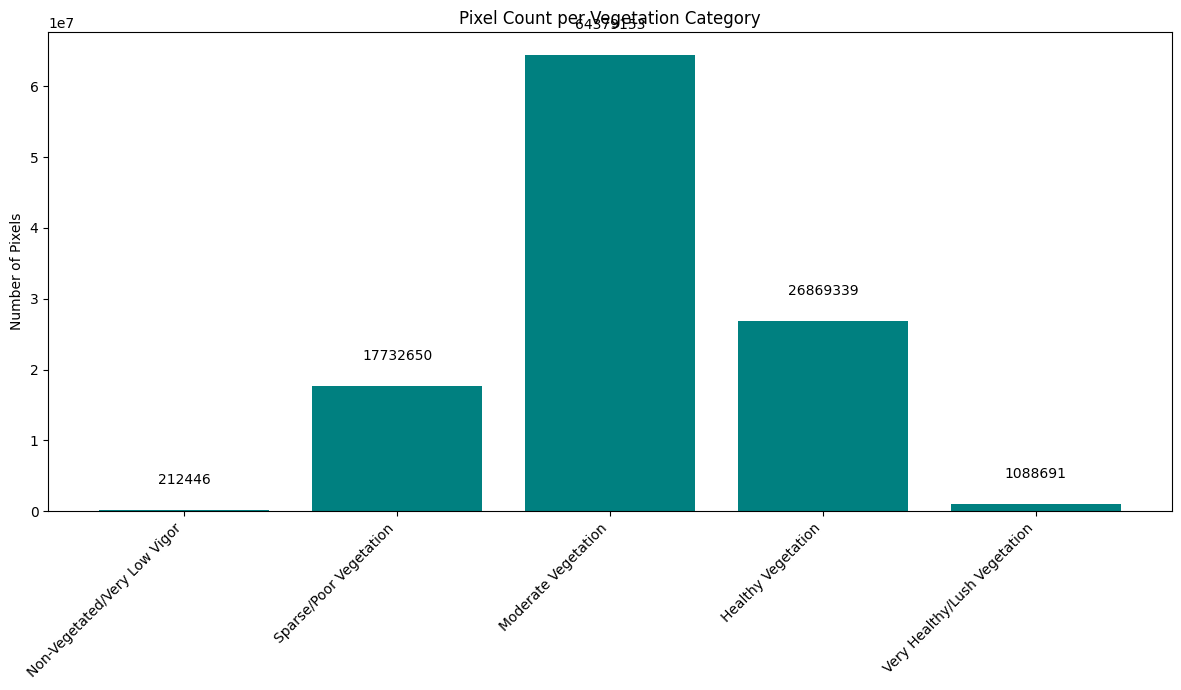

In [ ]:

import matplotlib.pyplot as plt
# --- Generate Bar Plot of Pixel Counts per Category ---
if 'category_counts' in locals() and total_classified_pixels > 0:
    # Filter out category 0 (NoData) for the plot
    plot_categories = {category_names.get(cid, f"Category {int(cid)}"): count for cid, count in category_counts.items() if cid != 0}

    if plot_categories: # Check if there are categories to plot
        labels = list(plot_categories.keys())
        sizes = list(plot_categories.values())

        plt.figure(figsize=(12, 7)) # Adjust figure size as needed
        bars = plt.bar(labels, sizes, color='teal') # Use a color

        plt.ylabel("Number of Pixels")
        plt.title("Pixel Count per Vegetation Category")
        plt.xticks(rotation=45, ha='right') # Rotate labels for readability
        plt.tight_layout() # Adjust layout to prevent labels overlapping

        # Optional: Add text labels for the count on top of the bars
        for bar in bars:
            yval = bar.get_height()
            plt.text(bar.get_x() + bar.get_width()/2, yval + 0.05 * max(sizes), yval, ha='center', va='bottom') # Adjust vertical offset

        plt.show()


Enter coordinates to view a section of the classified map:
Enter the starting row index (e.g., 100): 2000
Enter the ending row index (e.g., 200): 3000
Enter the starting column index (e.g., 100): 2000
Enter the ending column index (e.g., 200): 3000


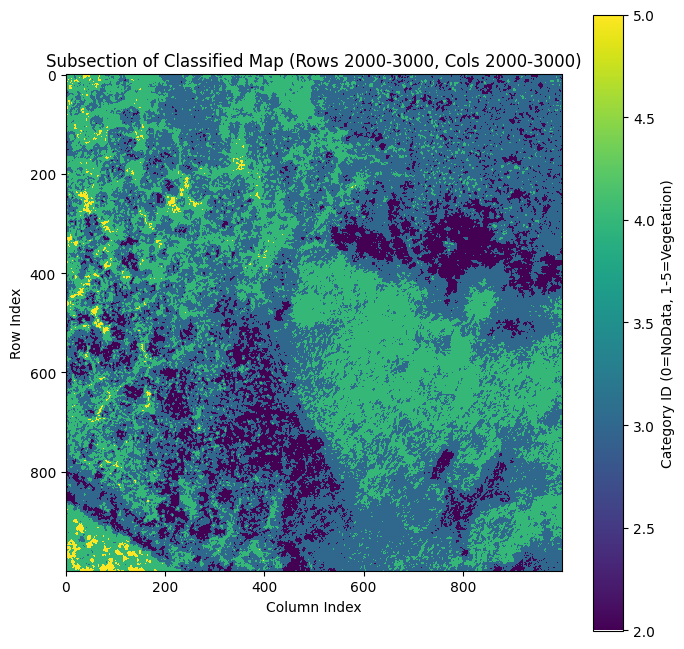


Shape of the extracted subsection: (1000, 1000)
Unique category IDs present in the subsection: [2 3 4 5]


In [ ]:

import matplotlib.pyplot as plt
import numpy as np
# Ask the user for coordinates or a bounding box
# For simplicity, let's ask for a top-left corner and a size for the sub-section

print("\nEnter coordinates to view a section of the classified map:")
# You can adjust these default values or ask for more precise inputs (e.g., minx, miny, maxx, maxy)
# Using row/column indices for array slicing is often easier for visual inspection.
start_row = int(input("Enter the starting row index (e.g., 100): "))
end_row = int(input("Enter the ending row index (e.g., 200): "))
start_col = int(input("Enter the starting column index (e.g., 100): "))
end_col = int(input("Enter the ending column index (e.g., 200): "))

# Validate inputs to ensure they are within the data dimensions
if 'classified_data' in locals() and classified_data is not None:
    height, width = classified_data.shape
    if (0 <= start_row < end_row <= height) and (0 <= start_col < end_col <= width):
        # Extract the sub-section
        classified_subsection = classified_data[start_row:end_row, start_col:end_col]

        # Display the sub-section
        plt.figure(figsize=(8, 8)) # Adjust figure size
        # Use cmap='viridis' or another appropriate colormap.
        # You might want a custom colormap to clearly distinguish categories 1-5 and 0 (NoData).
        # Here we use 'viridis' for simplicity, 0 will likely be the lowest color.
        # For a custom colormap:
        # from matplotlib.colors import ListedColormap
        # colors = ['black', 'red', 'orange', 'yellow', 'green', 'darkgreen'] # 0=NoData, 1=NonVeg, ..., 5=VeryHealthy
        # cmap = ListedColormap(colors)
        # bounds = [0, 1, 2, 3, 4, 5, 6] # Defines bins for the colormap
        # norm = plt.Normalize(vmin=0, vmax=5) # Normalizes data values to the colormap range

        plt.imshow(classified_subsection, cmap='viridis', interpolation='nearest')
        plt.title(f"Subsection of Classified Map (Rows {start_row}-{end_row}, Cols {start_col}-{end_col})")
        plt.colorbar(label="Category ID (0=NoData, 1-5=Vegetation)") # Add a color bar
        plt.xlabel("Column Index")
        plt.ylabel("Row Index")
        plt.show()

        print(f"\nShape of the extracted subsection: {classified_subsection.shape}")
        print("Unique category IDs present in the subsection:", np.unique(classified_subsection))

    else:
        print(f"Invalid input coordinates. Please ensure 0 <= start_row < end_row <= {height} and 0 <= start_col < end_col <= {width}.")
else:
    print("Classified data not available to view subsections.")